In [1]:
from math import sqrt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
btc_price_df = pd.read_csv("./Data/BTC_price_db.csv")
tweets_df = pd.read_csv("./Data/tweets_db.csv")

In [3]:
merge_df = pd.merge(btc_price_df,tweets_df, on='time_')
merge_df.head()

,time_,price_avg,neg,pos,neu
0,2021-06-27 12:57:30+03,33131.70085,0,0,2
1,2021-06-27 12:58:00+03,33108.42845,0,3,5
2,2021-06-27 12:58:30+03,33137.47000,1,1,1
3,2021-06-27 12:59:00+03,33103.82730,0,3,5
4,2021-06-27 12:59:30+03,33144.13585,0,1,1


In [4]:
# model_r = LinearRegression()
# x_train, x_test, y_train, y_test = train_test_split(merge_df.drop("price_avg", axis=1), merge_df["price_avg"])
# pipe = make_pipeline(ce.OrdinalEncoder(), StandardScaler(), LinearRegression()).fit(x_train, y_train)
# preds= pipe.predict(x_test)
# pipe.score(x_test,y_test)

In [5]:
X = merge_df.drop(["time_", "price_avg"], axis=1)
y = merge_df.price_avg

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=70)

poly_reg = PolynomialFeatures(degree = 3) # Increasing this value will create more features
poly_train = poly_reg.fit_transform(pd.DataFrame(X_train))
poly_test = poly_reg.transform(pd.DataFrame(X_test))

In [6]:
multi_lr = LinearRegression()

multi_lr.fit(X_train, y_train)
multi_lr.score(X_test,y_test)

-0.405706111846428

In [10]:
preds = multi_lr.predict(X_test)
mean_squared_error(y_test, preds)

10751.840052178188

In [8]:
# # Cost Functions for the Linear Regression (Tips)
# print("Cost functions for LR")
# print("MAE: ",mean_absolute_error(y_test, preds))
# print("RMSE: ",sqrt(mean_squared_error(y_test, preds)))
# print("MSE: ", mean_squared_error(y_test, preds))

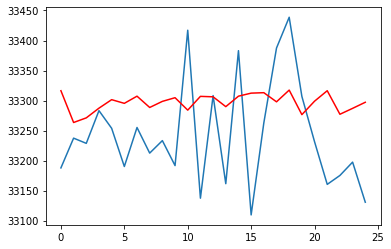

In [11]:
actual = [x for x in y_test]
# plot forecasts against actual outcomes
pyplot.plot(actual)
pyplot.plot(preds, color='red')
pyplot.show()